<a href="https://colab.research.google.com/github/mohamedanas1110/Yulu-Hypothesis-Testing/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yulu
Evalution Criteria:

1. Define Problem Statement and perform Exploratory Data Analysis (10 points)
  - Definition of problem (as per given problem statement with additional views)
  - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
  - Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
  - Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
  - Illustrate the insights based on EDA
    - Comments on range of attributes, outliers of various attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots
2. Hypothesis Testing (30 Points):
    - Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
    - ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
    - Chi-square test to check if Weather is dependent on the season (10 points)
3. Notebook Quality (10 points):
 - Structure & Flow
 - Well commented code


# Problem Statement

Yulu want to understand the factors affecting the demand for these shared electric cycles in the American market.

For example

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands?


In [ ]:
# !pip install pandas-profiling==3.1.0

In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"

import numpy as np
import missingno as msno
import pandas_profiling as pf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

# Basic Metrics

## Size, shape and data types

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
display(df.head())
print()
print(f"Rows/columns dimension - {df.shape}")
print()
print("Data types and basic Information - ")
print(df.info())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1



Rows/columns dimension - (10886, 12)

Data types and basic Information - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [ ]:
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

We do not have any null values in our data set which makes it easier for us to conduct our data analysis.

## convert string date to datetime object


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# To check if particular day influenced the demand
df['day'] = df['datetime'].dt.strftime('%A')
convert_day_in_words = {"day": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
                                 "Friday":5, "Saturday":6,"Sunday": 7}}
df = df.replace(convert_day_in_words)

## convert object data types to Categorical

In [ ]:
df["weather"]=df["weather"].astype("category")
df["season"]=df["season"].astype("category")
df["holiday"]=df["holiday"].astype("category")
df["workingday"]=df["workingday"].astype("category")
df["day"]=df["day"].astype("category")

## Summary

In [ ]:
df.describe(include="category").T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192
day,10886,7,6,1584


In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Univariate Analysis


## Count

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


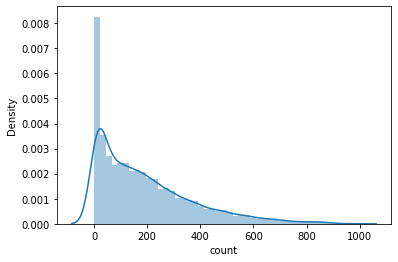

In [ ]:
sns.distplot(df['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


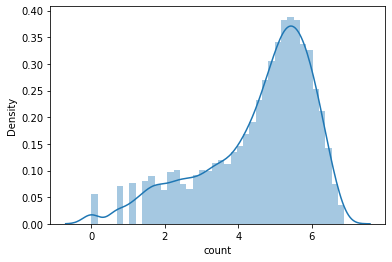

In [ ]:
#Looks Like skewed, lets do log normal to convert to gaussian
sns.distplot(np.log(df['count']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


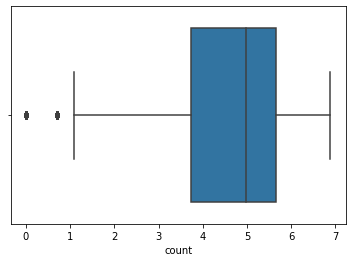

In [ ]:
#It seems like outliers are present
df['count'] = np.log(df['count'])
sns.boxplot(df['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


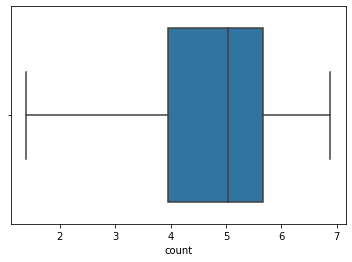

In [ ]:
new_df =df[(df['count']> 1.1)]
sns.boxplot(new_df['count'])

## registered

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


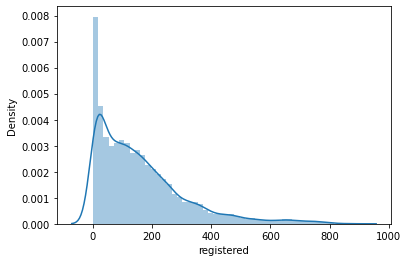

In [ ]:
sns.distplot(new_df['registered'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


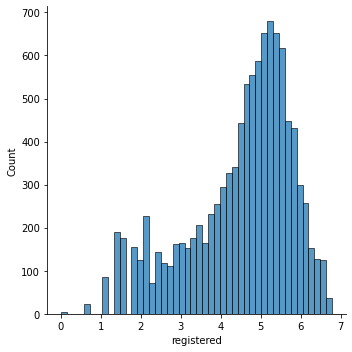

In [ ]:
#Looks Like skewed, lets do log normal
new_df['registered'] = np.log(new_df['registered'])
sns.displot(new_df['registered'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


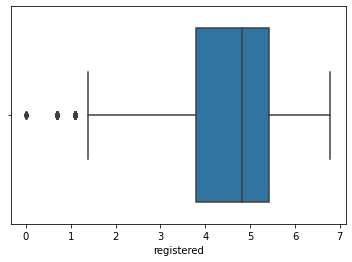

In [ ]:
sns.boxplot(new_df['registered'])

## casual

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


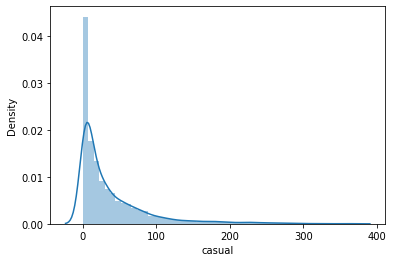

In [ ]:
sns.distplot(new_df['casual'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


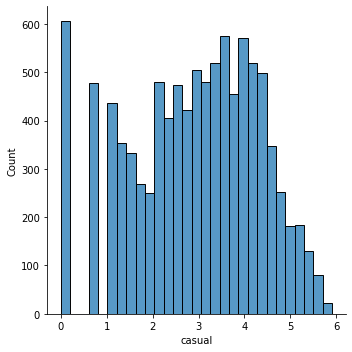

In [ ]:
#Looks Like skewed, lets do log normal
new_df['casual'] = np.log(new_df['casual'])
sns.displot(new_df['casual'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


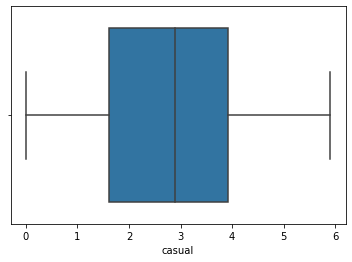

In [ ]:
sns.boxplot(new_df['casual'])

# Bivariate Analysis

## weather vs count

In [ ]:
new_df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6964.0,4.768209,1.317149,1.386294,4.043051,5.129899,5.743003,6.884487
2,2740.0,4.638980,1.289316,1.386294,3.912023,4.966329,5.598422,6.791221
3,800.0,4.234715,1.233626,1.386294,3.465736,4.382027,5.117994,6.792344
4,1.0,5.099866,NaN,5.099866,5.099866,5.099866,5.099866,5.099866


In [ ]:
new_df.groupby(['weather'])['count'].size().plot(kind="bar")

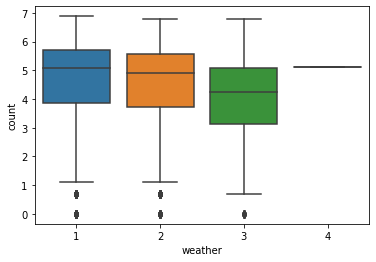

In [ ]:
sns.boxplot(x='weather', y='count', data=df)

## Season vs Count

In [ ]:
new_df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2457.0,4.299842,1.184790,1.386294,3.637586,4.477337,5.170484,6.685861
2,2668.0,4.801474,1.334177,1.386294,4.043051,5.181784,5.789960,6.771936
3,2707.0,4.899262,1.325891,1.386294,4.262680,5.288267,5.855072,6.884487
4,2673.0,4.740792,1.309253,1.386294,4.094345,5.111988,5.703782,6.854355


In [ ]:
new_df.groupby(['season'])['count'].size().plot(kind="bar")

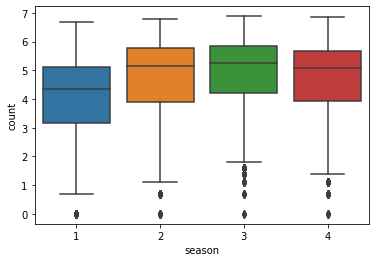

In [ ]:
sns.boxplot(x='season', y='count', data=df)

## working day vs count

In [ ]:
new_df.groupby(['workingday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3401.0,4.676731,1.265967,1.386294,3.871201,4.897840,5.730100,6.663133
1,7104.0,4.702129,1.332621,1.386294,3.988984,5.068904,5.645447,6.884487


In [ ]:
new_df.groupby(['workingday'])['count'].size().plot(kind="bar")

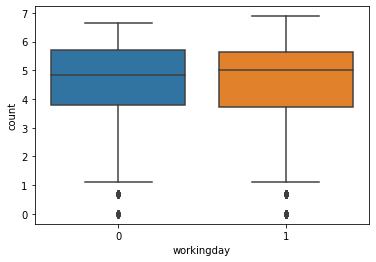

In [ ]:
sns.boxplot(x='workingday', y='count', data=df)

## holiday vs count

In [ ]:
new_df.groupby(['holiday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10200.0,4.696069,1.310651,1.386294,3.951244,5.030438,5.667290,6.884487
1,305.0,4.621592,1.336599,1.386294,3.713572,4.941642,5.736572,6.568078


In [ ]:
new_df.groupby(['holiday'])['count'].size().plot(kind="bar")

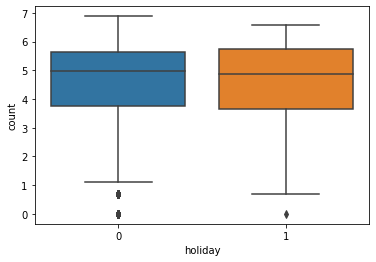

In [ ]:
sns.boxplot(x='holiday', y='count', data=df)

## Day(Mon- sun) vs count

In [ ]:
new_df.groupby(['day'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,1492.0,4.676807,1.341162,1.386294,3.926875,5.030438,5.642792,6.875232
2,1462.0,4.673841,1.351331,1.386294,3.951244,5.036953,5.638355,6.877296
3,1473.0,4.657627,1.350678,1.386294,3.891820,4.990433,5.634790,6.884487
4,1490.0,4.726470,1.334119,1.386294,4.043051,5.105945,5.655992,6.803505
5,1492.0,4.758332,1.285278,1.386294,4.143135,5.147494,5.677609,6.802395
6,1553.0,4.716331,1.270763,1.386294,3.912023,4.983607,5.752573,6.663133
7,1543.0,4.647773,1.246293,1.386294,3.860674,4.820282,5.712080,6.629363


In [ ]:
new_df.groupby(['day'])['count'].size().plot(kind="bar")

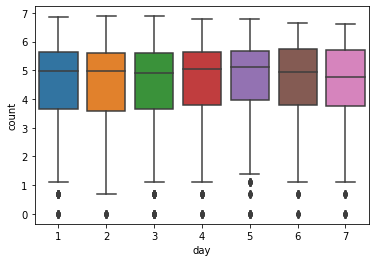

In [ ]:
sns.boxplot(x='day', y='count', data=df)

## HeatMap

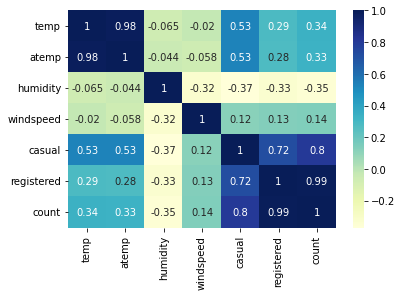

In [ ]:
sns.heatmap(new_df.corr(),annot = True, cmap="YlGnBu")

# Hypothesis Testing

Lets have a common significance level 5%

## Is Working Day Has effect

H0 is Working day has no effect on number of electric cycles

HA is Working day has an effect on number of electric cycles

In [ ]:
working_day_count = new_df [(new_df['workingday'] == 1)]
non_working_day_count = new_df [(new_df['workingday'] == 0)]
t_value,p_value=stats.ttest_ind(working_day_count['count'],non_working_day_count['count'])
print('p-value for two tailed test is %f'%p_value)

p-value for two tailed test is 0.353023


P-value is  greater than 0.05, so we accept the null hypothesis.

## Is Holiday Has effect

H0 is Holiday has no effect on number of electric cycles

HA is Holiday has an effect on number of electric cycles

In [ ]:
holiday_day_count = new_df [(new_df['holiday'] == 1)]
non_holiday_day_count = new_df [(new_df['holiday'] == 0)]
t_value,p_value=stats.ttest_ind(holiday_day_count['count'],non_holiday_day_count['count'])
print('p-value for two tailed test is %f'%p_value)

p-value for two tailed test is 0.328437


P-value is  greater than 0.05, so we accept the null hypothesis.

## Is Weather Has effect

H0 is weather has no effect on number of electric cycles

HA is weather has an effect on number of electric cycles

In [ ]:
clear_Weather_count = new_df [(new_df['weather'] == 1)]
mist_Weather_count = new_df [(new_df['weather'] == 2)]
Light_snow_rain_Weather_count = new_df [(new_df['weather'] == 3)]
Heavy_snow_rain_Weather_count = new_df [(new_df['weather'] == 4)]
F, p = stats.f_oneway(clear_Weather_count['count'],mist_Weather_count['count'],
                      Light_snow_rain_Weather_count['count'],Heavy_snow_rain_Weather_count['count'])
print('p-value for Annova test is %f'%p)

p-value for Annova test is 0.000000


P-value is  lesser than 0.05, so we reject the null hypothesis.

## Is weather dependent on season

H0 is Weather and season are Independent

HA is Weather and season are dependent

In [ ]:
pd.crosstab(new_df['weather'], new_df['season']).reset_index(drop=True)

season,1,2,3,4
0,1622,1758,1919,1665
1,654,697,598,791
2,180,213,190,217
3,1,0,0,0


In [ ]:
season_df = pd.crosstab(new_df['weather'], new_df['season']).reset_index(drop=True)

In [ ]:
stat, p, dof, expected = stats.chi2_contingency(season_df)
print('p-value for chi square test is %f'%p)

p-value for chi square test is 0.000000


P-value is  lesser than 0.05, so we reject the null hypothesis.

# Insights
1. Considering distplot of working day vs count, p value is  greater than alpha and almost every day has equal average. we can say that working day has no effect on demand of electric cycles

2. Considering displot of weather vs count and by performing annova where  p value is lesser than alpha. we can say that working day has an  effect on demand of electric cycles. ITs quite reasonable that during heavy rainy days demand of electric cycles is very lesser

3. By doing chi-square test to check whether is dependent on season.
It is clearly says that weather is dependent on season since p value is lesser than alpha

# Recommendations

1. During heavy rain , demand of cycles is very low therefore it is recommended to allot cycles based on weather and season.
2. By giving offers on weak days, might increase the usage of electric cycles.